Edoardo Merli edoardo.merli@studio.unibo.it

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

random_state = 42

1. Load the data and separate in X all the columns but the last one, in y the last column, then produce a pairplot of X and comment what you see

In [2]:
filename = 'exam_2021_01_15.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1


In [4]:
target = 'y'
X = df.drop(target, axis=1)
y = df[target]

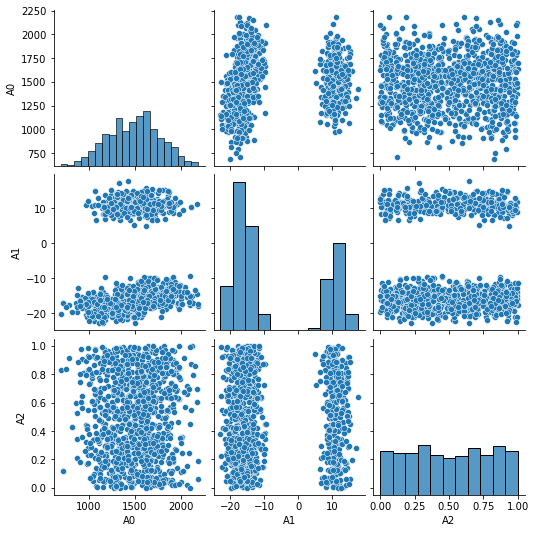

In [5]:
sns.pairplot(X);

From the pairplot we can see that attribute A1 enables us to linearly separate the datapoints into 2 distinct groups. The contribution of A0 and A2 is less evident.

2. Find the best clustering scheme for X with a method of your choice, plot the silhouhette index for an appropriate range of parameters and show the chosen hyperparameter(s)

We will use K-Means with the parameter K ranging from 2 to 10

In [6]:
k_range = list(range(2, 11))
distorsions = []
silhouette_scores = []

In [7]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
    y_km = kmeans.fit_predict(X)
    distorsions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, y_km))

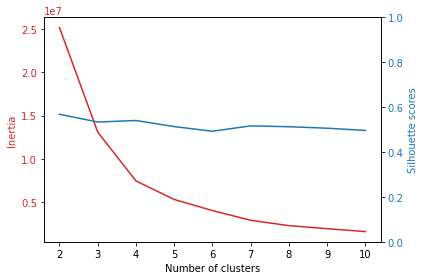

In [8]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color1)
ax1.plot(k_range, distorsions, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()

color1 ='tab:blue'
ax2.set_ylabel('Silhouette scores', color=color1)
ax2.plot(k_range, silhouette_scores, color=color1)
ax2.tick_params(axis='y', labelcolor=color1)
ax2.set_ylim(0,1)

fig.tight_layout()
plt.show()

To obtain a more complete analysis of the optimal number of clusters we decided to consider inertia on top of the silhouette score.
Using the elbow method on the inertia, two possible elbow points could be 3 and 4. Considering also the Silhouette scores, we choose as number of clusters k=4 because of its higher score.

In [9]:
best_k = 4

3. Fit the clustering scheme, store the cluster labels in y_km and output the silhouette score

In [10]:
kmeans = KMeans(n_clusters=best_k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
y_km = kmeans.fit_predict(X)
best_distortion = kmeans.inertia_
best_silhouette_score = silhouette_score(X, y_km)
print(f"The silhouette score for the chosen hyperparameter (k={best_k}) is {round(best_silhouette_score, 2)}")

The silhouette score for the chosen hyperparameter (k=4) is 0.54


4. Confusion matrix

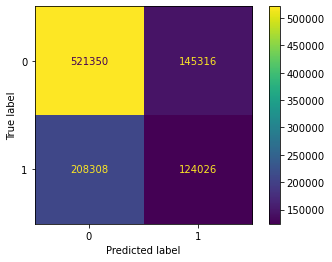

In [11]:
cm = pair_confusion_matrix(y, y_km)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


5. Consider possible pre-processing actions, repeat the fitting and evaluate as before the result of the new fitting

Considering the pairplot we can see that attributes A0 and A2 might not be informative for the clustering, so we decided to use *feature subset selection* over {(A0, A1), (A1, A2)} and repeat the fitting process for each one

In [12]:
def kmeans_fitting(X_new, y):
    # hyperparameters and scores
    K_range = list(range(2, 11))
    distorsions = []
    silhouette_scores = []

    for k in K_range:
        # fit k-means
        kmeans = KMeans(n_clusters=k, random_state=random_state, init="k-means++")
        y_km = kmeans.fit_predict(X_new)
        distorsions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_new, y_km))


    # Plots of inertia and silhouette
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(K_range, distorsions, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color ='tab:blue'
    ax2.set_ylabel('Silhouette scores', color=color)
    ax2.plot(K_range, silhouette_scores, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1)

    fig.tight_layout()
    plt.show()


-----------------------------------------------------
Trial considering features: ['A0', 'A1']


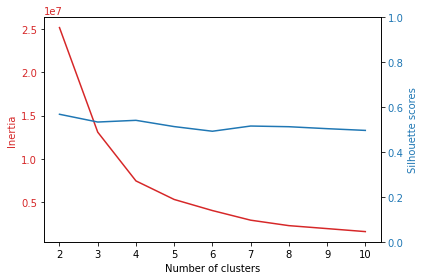

-----------------------------------------------------
Trial considering features: ['A1', 'A2']


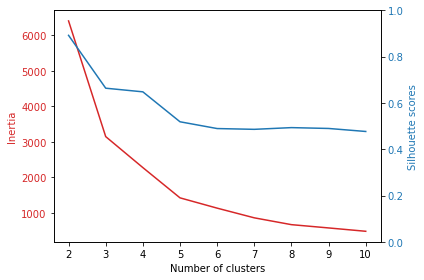

In [13]:
features_subsets = [['A0', 'A1'], ['A1', 'A2']]
for features in features_subsets:
    X_new = X[features]
    print("-----------------------------------------------------")
    print(f"Trial considering features: {features}")
    kmeans_fitting(X_new, y)


The graph obtained excluding feature 'A2' is identical to the one considering the whole data, while the one obtained excluding 'A0' has a significant lower values for inertia and higher values of silhouette scores.
Therefore we will continue the evaluation only of the model trained with the last feature subset, in particular by choosing the optimal k as 3 (clear elbow point and higher silhouette than e.g. k=5)

In [14]:
best_k_fss = 3

In [15]:
kmeans_fss = KMeans(n_clusters=best_k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
y_km_fss = kmeans_fss.fit_predict(X_new)
best_distortion_fss = kmeans_fss.inertia_
best_silhouette_score_fss = silhouette_score(X_new, y_km_fss)
print(f"The silhouette score for the chosen hyperparameter (k={best_k_fss}) is {round(best_silhouette_score_fss * 100, 2)}%")

The silhouette score for the chosen hyperparameter (k=3) is 64.81%


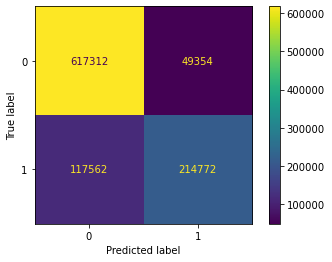

In [16]:
cm = pair_confusion_matrix(y, y_km_fss)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


As expected, the pair confusion matrix yields considerably better results than the previous one!